In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from keras import *
import os
import random
import cv2
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
def load_data(path,size = 150):
    data = []
    label = []
    for dirname in os.listdir(path):
        if dirname == 'NORMAL':
            for file in os.listdir(path + dirname):
                img = cv2.imread(path + dirname+'/'+ file, cv2.IMREAD_GRAYSCALE)
                rescaled_image = cv2.resize(img,(size,size))
                data.append(rescaled_image)
                label.append('NORMAL')
        else:
            for file in os.listdir(path + dirname):
                img = cv2.imread(path + dirname+'/'+ file, cv2.IMREAD_GRAYSCALE)
                rescaled_image = cv2.resize(img,(size,size))
                data.append(rescaled_image)
                label.append('PNEUMONIA')
    return data,label
                

In [3]:
training_data,training_label  = load_data('/kaggle/input/chest_xray/train/')
test_data,test_label  = load_data('/kaggle/input/chest_xray/test/')
val_data,val_label  = load_data('/kaggle/input/chest_xray/val/')
#/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg
#cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/train/')
#os.listdir('/kaggle/input/')

In [4]:
training_data = np.array(training_data)
training_label = np.array(training_label)

test_data = np.array(test_data)
test_label = np.array(test_label)

val_data = np.array(val_data)
val_label = np.array(val_label)

#### Data Visulaization

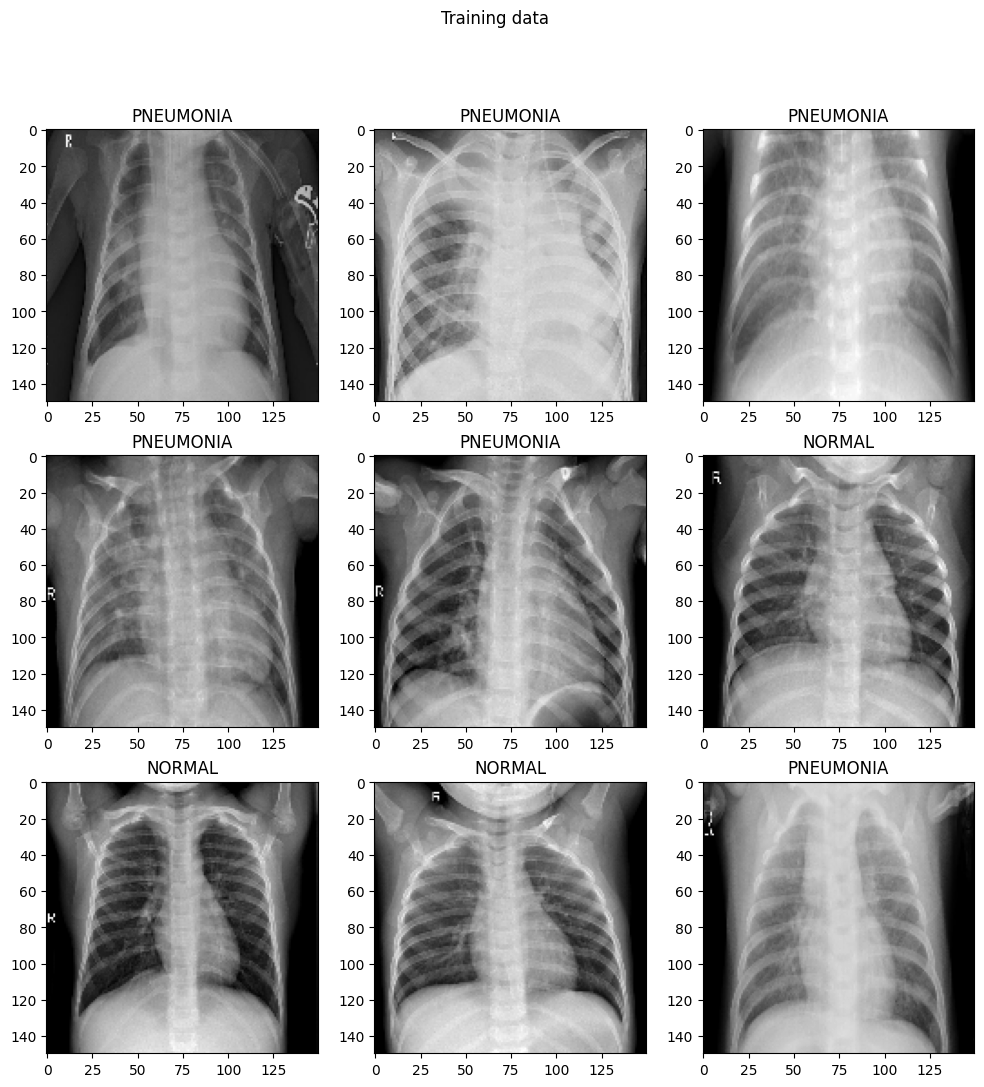

In [6]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data')
    random_index = random.randint(0,training_data.shape[0]-1)
    ax.imshow(training_data[random_index], cmap = 'gray')
    ax.set_title(training_label[random_index])

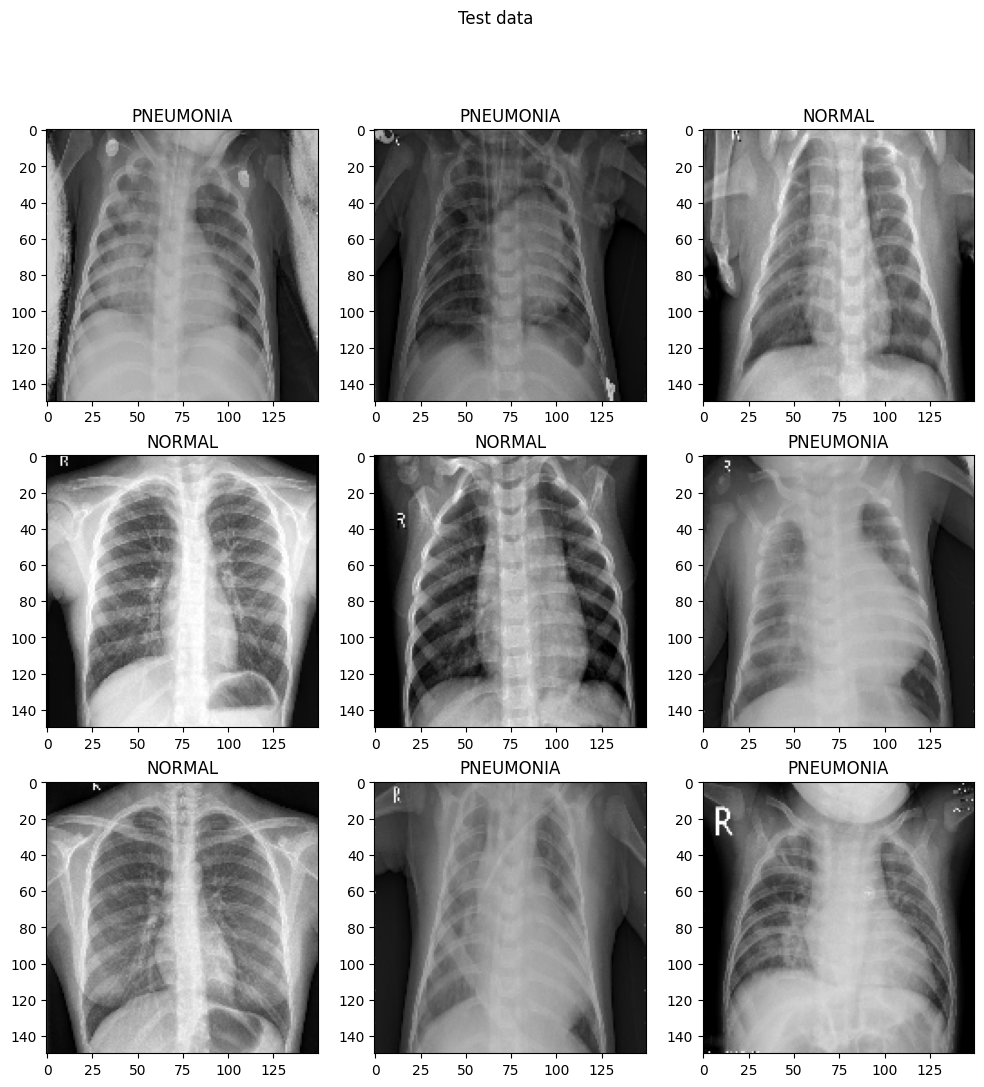

In [7]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Test data')
    random_index = random.randint(0,test_data.shape[0]-1)
    ax.imshow(test_data[random_index], cmap = 'gray')
    ax.set_title(test_label[random_index])

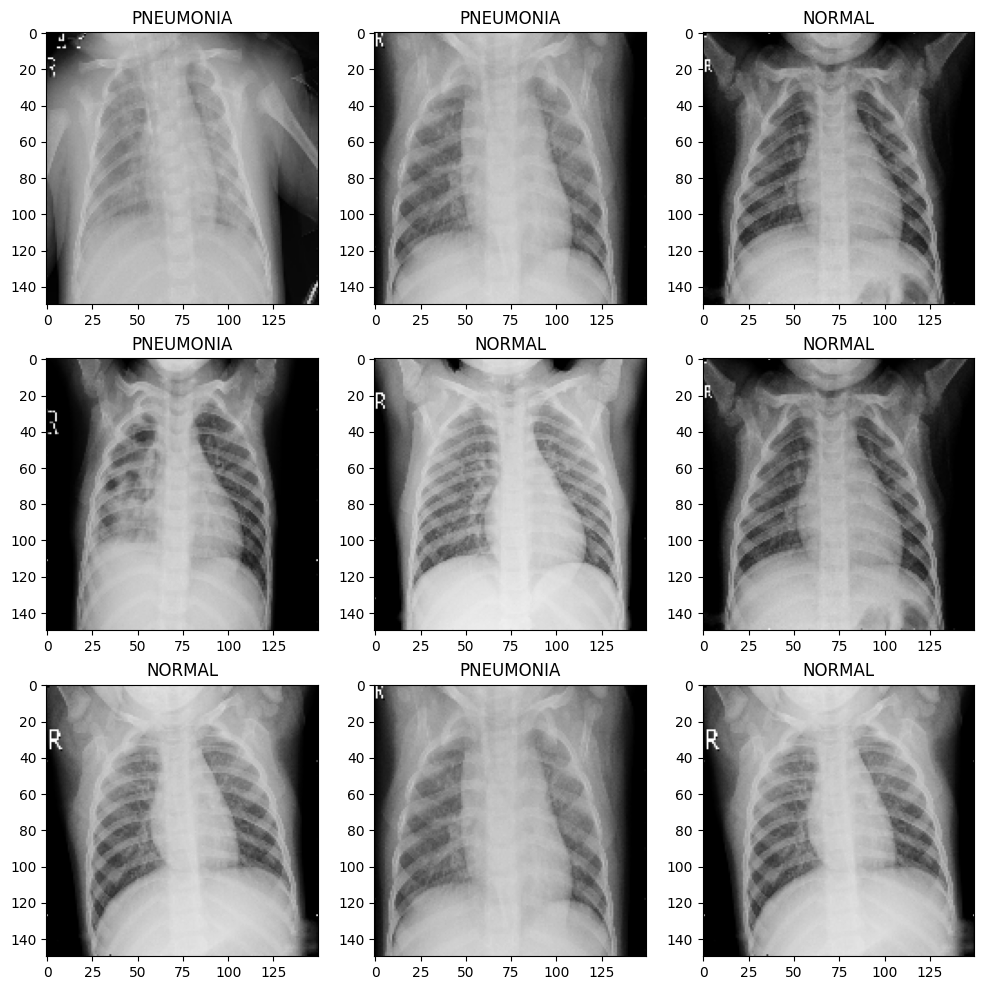

In [8]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.title('Validation data')
    random_index = random.randint(0,val_data.shape[0]-1)
    ax.imshow(val_data[random_index], cmap = 'gray')
    ax.set_title(val_label[random_index])

#### Data Preprocessing

<Axes: ylabel='count'>

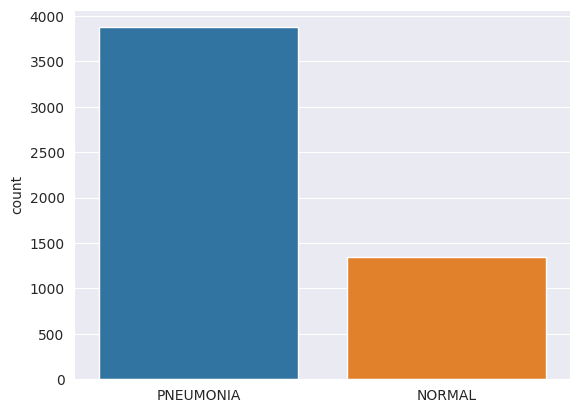

In [9]:
sns.set_style('darkgrid')
sns.countplot(x = training_label)

#### The data set is not balanced. We need to generate data to balance the dataset.
* Train a model with imbalanced data
* Train a model with balanced generated data and compare the results

#### Label encoding

In [10]:
training_encoder = LabelEncoder()

training_label_enocded = training_encoder.fit_transform(training_label)

In [11]:
val_encoder = LabelEncoder()

val_label_enocded = val_encoder.fit_transform(val_label)

In [12]:
test_encoder = LabelEncoder()

test_label_enocded = test_encoder.fit_transform(test_label)

### Model training with imbalanced Data

In [13]:
training_data.shape

(5216, 150, 150)

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [60]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 22500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │      11,520,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,684,865 (44.57 MB)

 Trainable params: 11,684,865 (44.57 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history  = model.fit(training_data, training_label_enocded, epochs = 5, validation_data = (val_data, val_label_enocded))

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.6867 - loss: 582.5374 - val_accuracy: 0.5000 - val_loss: 276.7299
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.8474 - loss: 21.0344 - val_accuracy: 0.5000 - val_loss: 152.8599
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.8808 - loss: 10.2394 - val_accuracy: 0.9375 - val_loss: 2.2954
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9174 - loss: 4.0148 - val_accuracy: 0.6875 - val_loss: 12.5416
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.8960 - loss: 6.6992 - val_accuracy: 0.9375 - val_loss: 3.0531


### Model Evaluation

In [63]:
model.evaluate(training_data, training_label_enocded)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9483 - loss: 1.4010


[1.3037744760513306, 0.9537960290908813]

In [64]:
training_label_predicted  = model.predict(training_data)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


#### Classification Report

In [65]:
print(classification_report(training_label_enocded,training_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1341
           1       0.99      0.92      0.95      3875

    accuracy                           0.93      5216
   macro avg       0.90      0.95      0.92      5216
weighted avg       0.94      0.93      0.94      5216



#### Data Visualization

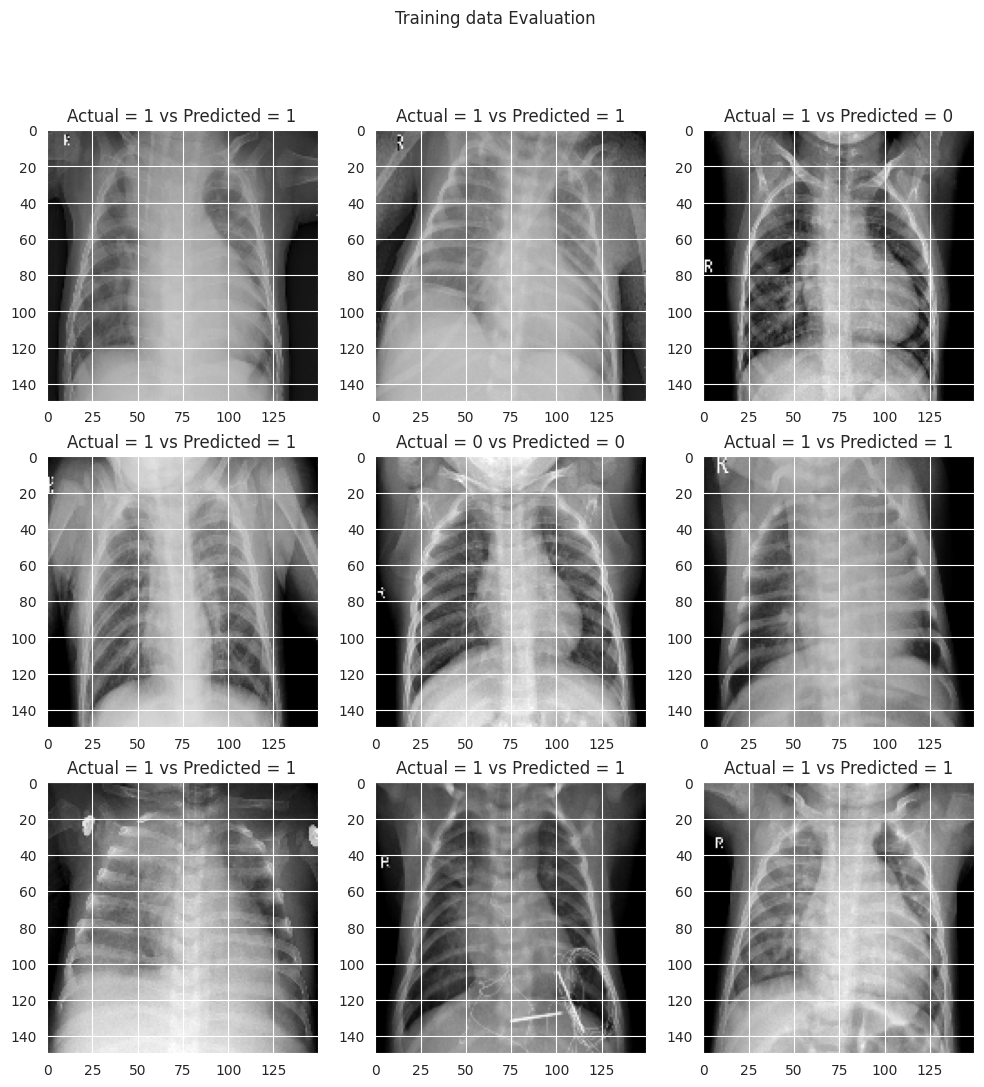

In [67]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data Evaluation')
    random_index = random.randint(0,training_data.shape[0]-1)
    ax.imshow(training_data[random_index], cmap='gray')
    ax.set_title(f'Actual = {training_label_enocded[random_index]} vs Predicted = {training_label_predicted.reshape(-1).astype(int)[random_index]}')

#### Heatmap (confusion matrix)

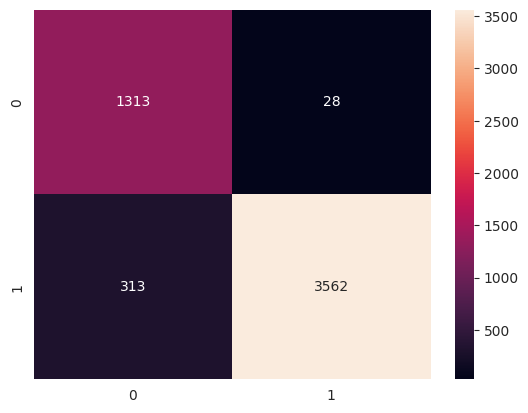

In [68]:
sns.heatmap(confusion_matrix(training_label_enocded,training_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()

### Model Validation

In [69]:
model.evaluate(val_data, val_label_enocded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9375 - loss: 3.0531


[3.0530595779418945, 0.9375]

In [70]:
val_label_predicted  = model.predict(val_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [71]:
print(classification_report(val_label_enocded,val_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



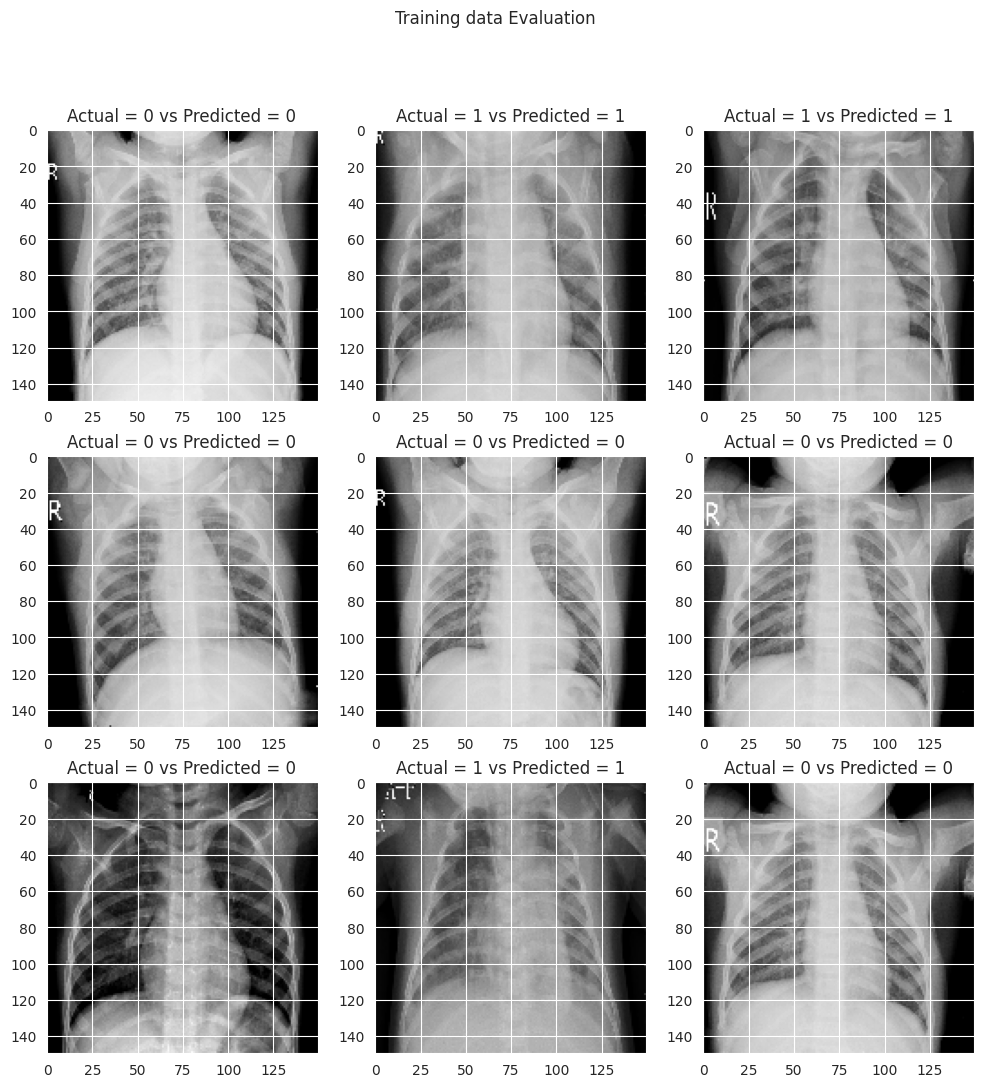

In [72]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data Evaluation')
    random_index = random.randint(0,val_data.shape[0]-1)
    ax.imshow(val_data[random_index], cmap = 'gray')
    ax.set_title(f'Actual = {val_label_enocded[random_index]} vs Predicted = {val_label_predicted.reshape(-1).astype(int)[random_index]}')

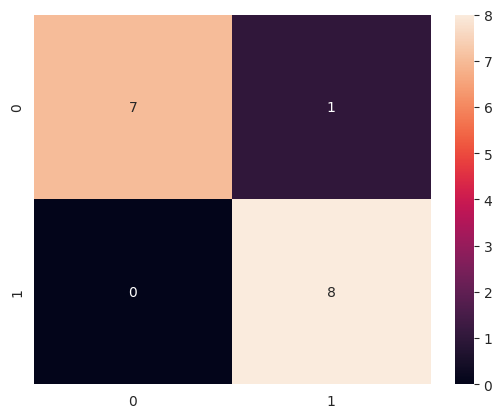

In [73]:
sns.heatmap(confusion_matrix(val_label_enocded,val_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()

### Model Testing

In [74]:
model.evaluate(test_data, test_label_enocded)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9152 - loss: 3.5621


[10.679702758789062, 0.7948718070983887]

In [75]:
test_label_predicted  = model.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [76]:
print(classification_report(test_label_enocded,test_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70       234
           1       0.79      0.94      0.86       390

    accuracy                           0.81       624
   macro avg       0.83      0.77      0.78       624
weighted avg       0.82      0.81      0.80       624



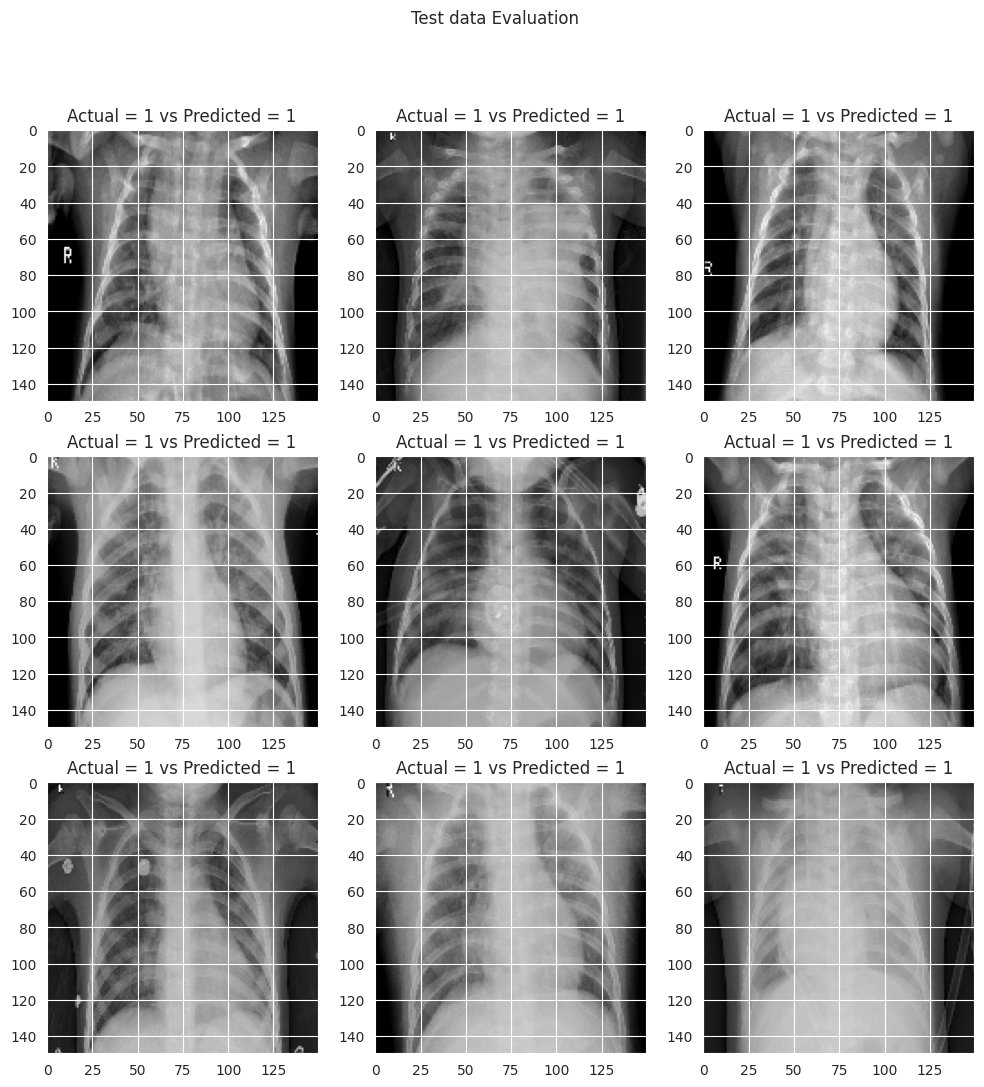

In [78]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Test data Evaluation')
    random_index = random.randint(0,test_data.shape[0]-1)
    ax.imshow(test_data[random_index], cmap = 'gray')
    ax.set_title(f'Actual = {test_label_enocded[random_index]} vs Predicted = {test_label_predicted.reshape(-1).astype(int)[random_index]}')

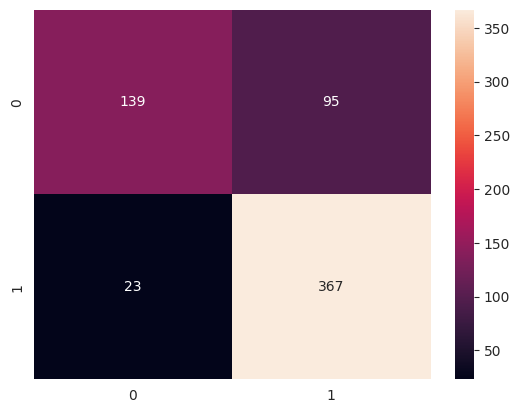

In [79]:
sns.heatmap(confusion_matrix(test_label_enocded,test_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()

In [90]:
history.history

{'accuracy': [0.7716640830039978,
  0.8784509301185608,
  0.910851240158081,
  0.9173696041107178,
  0.9001150131225586],
 'loss': [227.96937561035156,
  12.20468521118164,
  6.4090471267700195,
  3.9740562438964844,
  6.578731060028076],
 'val_accuracy': [0.5, 0.5, 0.9375, 0.6875, 0.9375],
 'val_loss': [276.7299499511719,
  152.85986328125,
  2.2953758239746094,
  12.541624069213867,
  3.0530595779418945]}

### Model Analysis

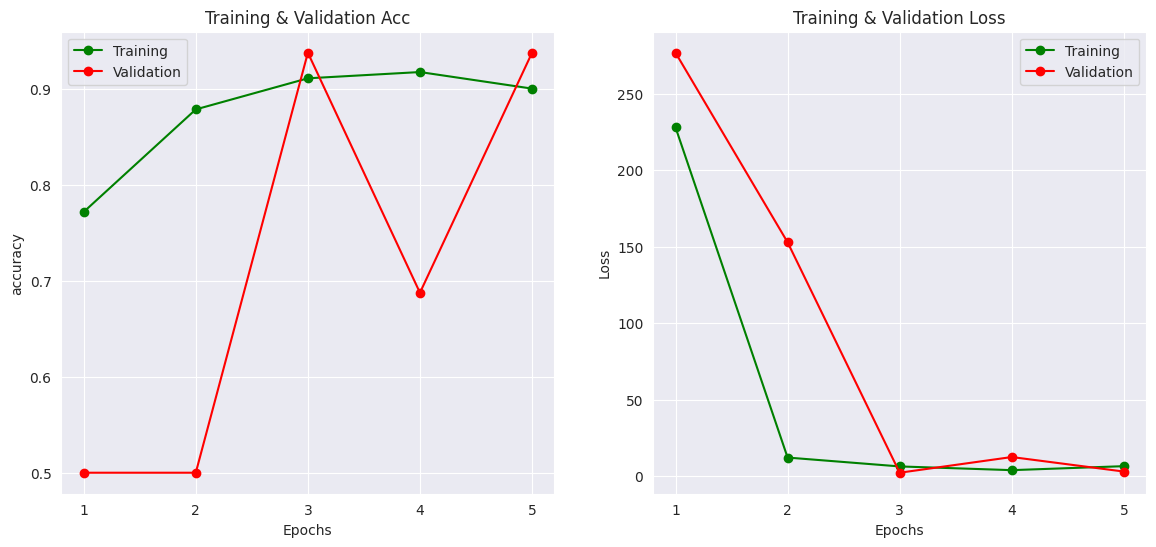

In [156]:
epochs = ['1', '2', '3', '4','5']
_,axs = plt.subplots(1,2 ,figsize = (14,6))
axs[0].plot(epochs,history.history['accuracy'], 'go-',label = 'Training')
axs[0].plot(epochs, history.history['val_accuracy'],'ro-',label = 'Validation')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('accuracy')
axs[0].legend()
axs[0].set_title('Training & Validation Acc')

axs[1].plot(epochs,history.history['loss'], 'go-',label = 'Training')
axs[1].plot(epochs, history.history['val_loss'],'ro-',label = 'Validation')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].set_title('Training & Validation Loss')

'''axs[1][0].plot(epochs,history.history['accuracy'], 'go-',label = 'Training')
axs[1][0].plot(epochs, history.history['val_accuracy'],'ro-',label = 'Validation')
axs[1][0].set_xlabel('Epochs')
axs[1][0].set_ylabel('accuracy')
axs[1][0].legend()
axs[1][0].set_title('Training & Validation Acc')

axs[1][1].plot(epochs,history.history['accuracy'], 'go-',label = 'Training')
axs[1][1].plot(epochs, history.history['val_accuracy'],'ro-',label = 'Validation')
axs[1][1].set_xlabel('Epochs')
axs[1][1].set_ylabel('accuracy')
axs[1][1].legend()
axs[1][1].set_title('Training & Validation Acc')'''

plt.show()